<a href="https://colab.research.google.com/github/huyenmaddie/jupyter/blob/master/TrungX_Batch_7_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GUIDELINES:
* Shift + Enter để execute cell (nên execute từ trên xuống dưới)
* Click vào Runtime trên Toolbar để xem các lựa chọn execute khác nhau

*BƯỚC 1: TRƯỚC BUỔI CALIBRATION
* Download file kết quả .csv trong folder về local
* Upload file kết quả .csv vừa download vào cell Upload
* Chỉnh input tên file (nếu cần) vào cell Input
* Runtime --> run all after

*BƯỚC 2: TRONG BUỔI CALIBRATION
* Reconnect nếu cần
* Sử dụng Table of contents để navigate dễ  dàng hơn
* Với các cell có lựa chọn param, chọn param sau đó Shift+Enter hoặc ấn vào biểu tượng play bên trái để  render lại plot/bảng theo param đã chọn




# Set up

In [ ]:
#@title Upload
# -*- coding: utf-8 -*-
from __future__ import print_function
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
%matplotlib inline
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving sun.csv to sun.csv


In [ ]:
#@title Input
# Input tên file .csv như output bên trên trong ngoặc kép, sau đó Runtime--> Run after
sun = pd.read_csv("sun.csv")


In [ ]:
#@markdown Insert list of GL here
gl_list = ["Phan Thanh Hải", "Đỗ Xuân Đức","Tạ Cao Thành",
           "Vũ Trung Kiên","Bùi Quý Tuyên","Dương Văn Báo"]

In [ ]:
#@title
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [ ]:
#@title
map_perf = {"So so (Need Improvement)": 1,
            "Good (Consistently meets expectations)": 2,
            "So Good (Exceeds expectations)": 3,
            "Great (Strongly exceeds expectations)": 4,
            "Awesome (Superb)": 5}
sun.performance_rating = sun.performance_rating.map(map_perf)

In [ ]:
#@title
map_grade = {'Starter':1,
             'Player 1':2,
             'Player 2':3,
             'Main Player':4,
             'Leading Player up':5}

In [ ]:
#@title
sun.rank_to_grade = sun.rank_to_grade.map(map_grade)

In [ ]:
#@title
sun_all = sun.copy()

In [ ]:
#@title
sun = sun_all[sun_all["Kỳ"] == "06/2020"]
previous_sun = sun_all[sun_all["Kỳ"] == "12/2019"]

In [ ]:
#@title
df = sun[(sun.group_leader.isin(gl_list)) & (sun["Kỳ"] == "06/2020")]
previous_df = previous_sun[previous_sun.group_leader.isin(gl_list)]

# Số liệu chung

In [ ]:
#@title Performance của Unit và các GL (%)
data_p1 = df.copy()
data_u = sun.copy()
reverse_perf = {1: "So so",
            2: "Good",
            3: "So Good",
            4: "Great",
            5: "Awesome"}
data_p1.performance_rating = data_p1.performance_rating.map(reverse_perf)
data_u.performance_rating = data_u.performance_rating.map(reverse_perf)
for unit in data_p1.unit.unique():
  crosstab_unit_data = data_u[(data_u.unit==unit) & (data_u.Role=="GL-review")]
  crosstab_gl_data = data_p1[(data_p1.unit==unit) & (data_p1.group_leader.isin(gl_list)) & (data_p1.Role=="GL-review")]
  group_leader_performance = pd.crosstab(crosstab_gl_data.performance_rating, crosstab_gl_data.group_leader, normalize='columns').round(4)*100
  unit_performance = pd.crosstab(crosstab_unit_data.performance_rating, crosstab_unit_data.unit, normalize='columns').round(4)*100
  # display(group_leader_performance)
  # display(unit_performance)
  unit_table = pd.concat([unit_performance,group_leader_performance], axis=1, join='outer')
  display(unit_table)


,Engineering Unit Vietnam 1 (EUV1),Dương Văn Báo,Phan Thanh Hải
performance_rating,,,
Good,47.18,35.29,56.0
Great,3.52,11.76,4.0
So Good,43.66,52.94,36.0
So so,5.63,0.00,4.0


,Engineering Unit Vietnam 2 (EUV2),Bùi Quý Tuyên,Tạ Cao Thành,Vũ Trung Kiên
Awesome,0.35,NaN,NaN,NaN
Good,55.36,42.86,31.25,52.0
Great,7.61,7.14,0.00,8.0
So Good,31.14,50.00,50.00,28.0
So so,5.54,0.00,18.75,12.0


,Engineering Unit Vietnam 3 (EUV3),Đỗ Xuân Đức
performance_rating,,
Awesome,0.71,5.56
Good,46.43,38.89
Great,7.86,5.56
So Good,25.71,11.11
So so,19.29,38.89


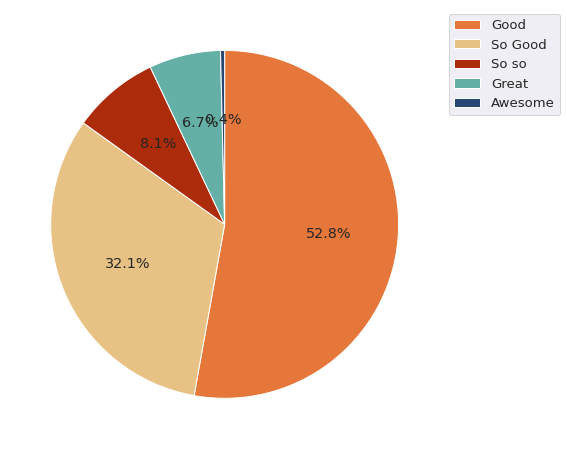

In [ ]:
#@title Performance toàn công ty 
sns.set(font_scale=1.2)
sun_p = sun[sun.Role=="GL-review"].copy()

p_cdict = {'Awesome': '#274671',
           'Great': '#64B0A6',
           'So Good': '#E8C285',
           'Good': '#E5773B',
           'So so':'#AB2B0B'}

sun_p.performance_rating = sun_p.performance_rating.map(reverse_perf)
sun_performance = sun_p.performance_rating.value_counts(normalize=True).round(4)*100
colors = [p_cdict[x] for x in sun_performance.index]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sun_performance,
       autopct='%.1f%%', startangle=90,
       counterclock=False,
       colors=colors)

ax.legend(sun_performance.index, bbox_to_anchor=(1,1))

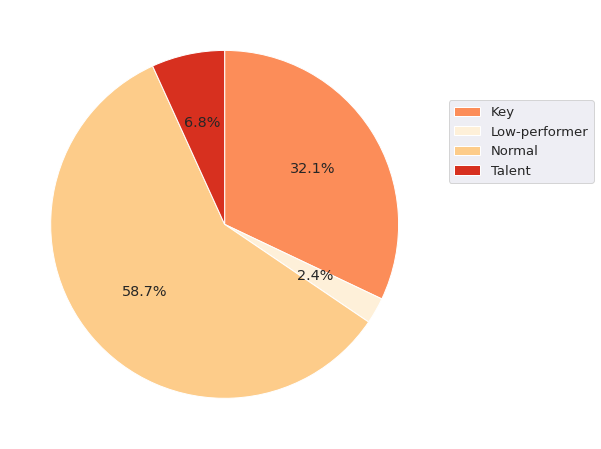

In [ ]:
#@title Phân bố Competency toàn công ty
c_company = sun.copy()
c_company = c_company[c_company.Competence_type.notnull()]

c_cdict = {'Talent': '#d7301f',
           'Key': '#fc8d59',
           'Normal': '#fdcc8a',
           'Low-performer': '#fef0d9'}

fig, ax_company = plt.subplots(figsize=(8,8))
data = c_company[c_company.Role=="GL-review"]["Competence_type"].value_counts(normalize=True).sort_index()
colors = [c_cdict[competency] for competency in data.index]
ax_company.pie(data, autopct='%.1f%%', startangle=90,counterclock=False, colors=colors)
ax_company.legend(data.index, bbox_to_anchor=(1,0.8))

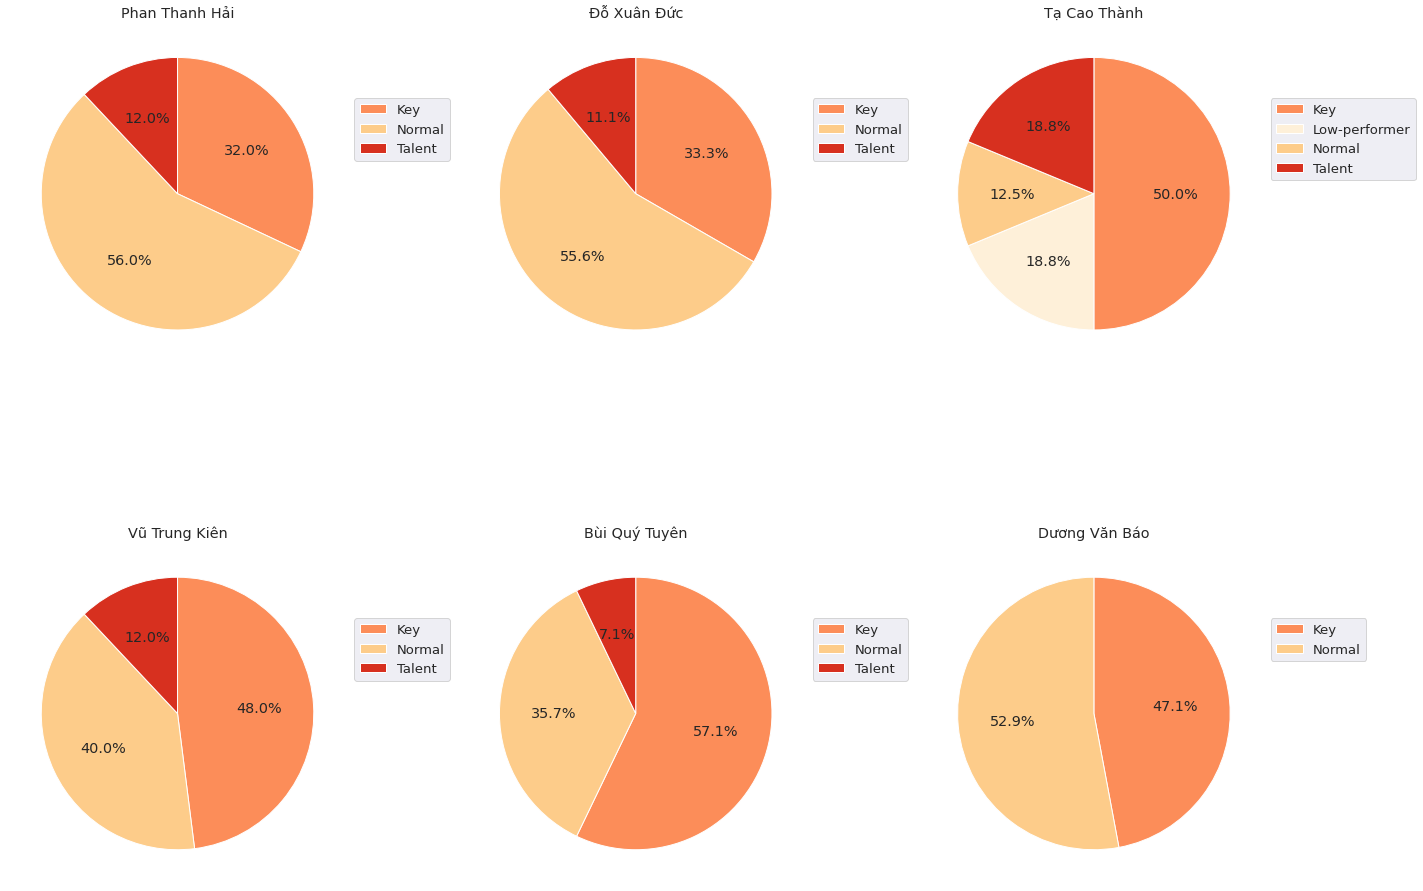

In [ ]:
#@title Phân bố Competency của các Group
c_data = df.copy()
c_data = c_data[c_data.Competence_type.notnull()]
sns.set(font_scale=1.2)
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(20,15))
axes_list = [item for sublist in axes for item in sublist]

for gl in gl_list:
  ax = axes_list.pop(0)
  condition = (c_data.group_leader==gl) & (c_data.Role=="GL-review")
  data=c_data[condition]["Competence_type"].value_counts(normalize=True).sort_index()
  colors = [c_cdict[competency] for competency in data.index]
  ax.pie(data,
         autopct='%.1f%%',
         startangle=90,
         counterclock=False,
         colors=colors)
  ax.legend(data.index, bbox_to_anchor=(1,0.8))
  ax.set_title(f"{gl}")

plt.tight_layout()

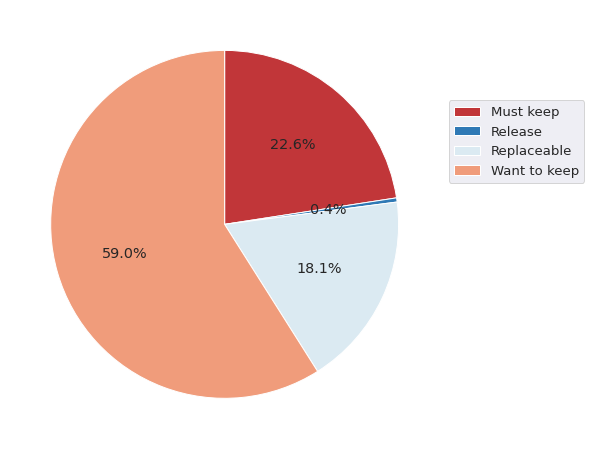

In [ ]:
#@title Phân bố Retention toàn công ty
r_company = sun.copy()
r_company = r_company[r_company.Retention_action.notnull()]

r_cdict = {'Must keep':(0.7561707035755478, 0.21038062283737025, 0.22352941176470587),
           'Want to keep':(0.9407151095732411, 0.609919261822376, 0.481276432141484),
           'Replaceable':(0.8605151864667436, 0.9174163783160324, 0.9487120338331411),
           'Release':(0.18431372549019615, 0.4726643598615917, 0.7116493656286045) }

fig, ax = plt.subplots(figsize=(8,8))
r_data = r_company[r_company.Role=="GL-review"]["Retention_action"].value_counts(normalize=True).sort_index()

ax.pie(r_data, autopct='%.1f%%', startangle=90,counterclock=False,
       colors = [r_cdict[r] for r in r_data.index])
ax.legend(r_data.index, bbox_to_anchor=(1,0.8))

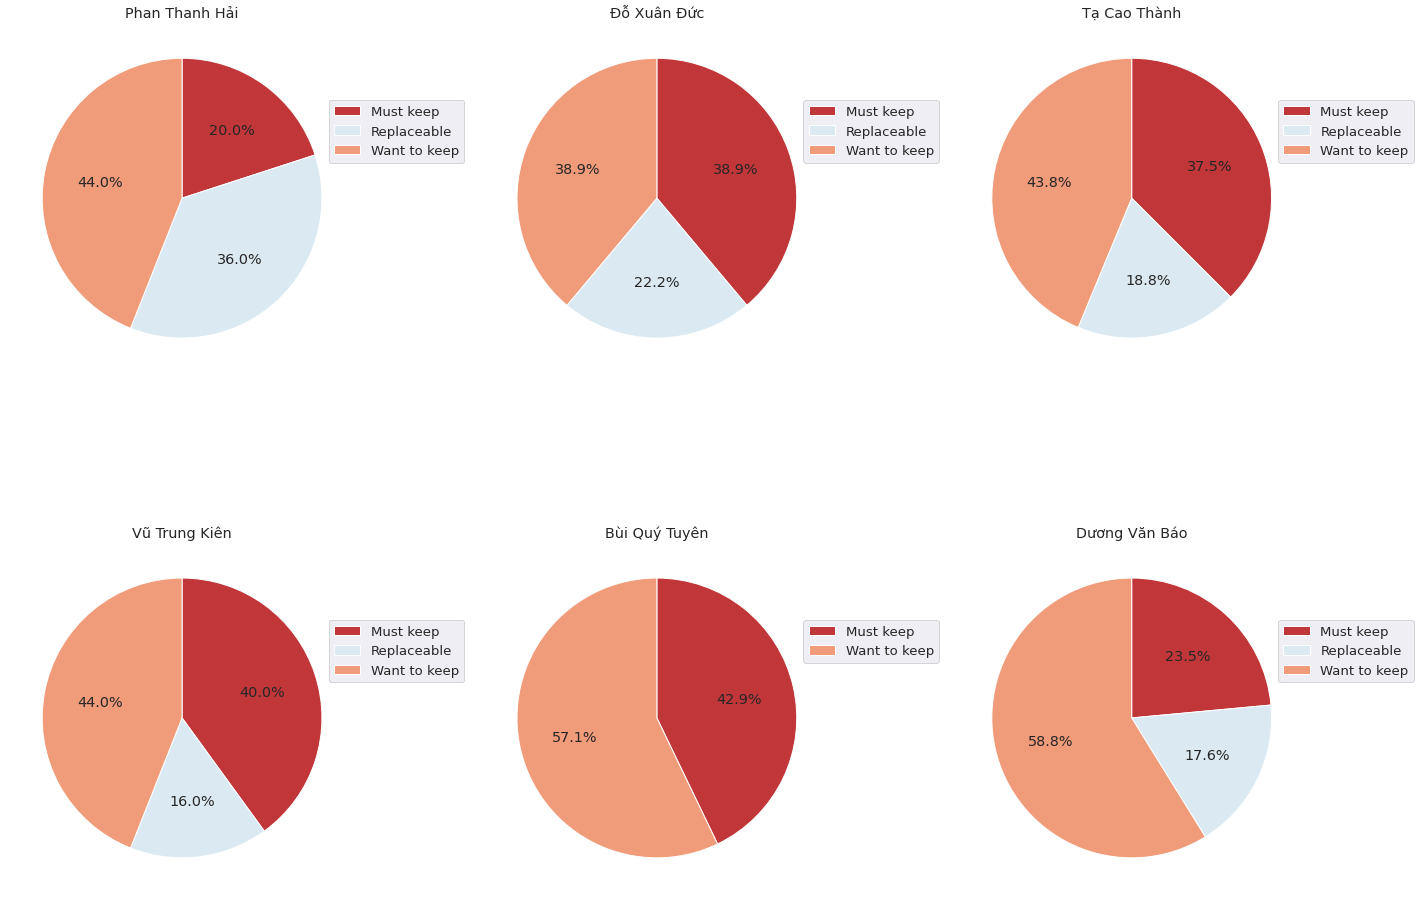

In [ ]:
#@title Phân bố Retention của các Group
r_data = df.copy()
r_data = r_data[r_data.Retention_action.notnull()]

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,figsize=(20,15))
axes_list = [item for sublist in axes for item in sublist]

for gl in gl_list:
  ax = axes_list.pop(0)
  condition = (r_data.group_leader==gl) & (r_data.Role=="GL-review")
  data = r_data[condition]["Retention_action"].value_counts(normalize=True).sort_index()
  colors = [r_cdict[r] for r in data.index]
  ax.pie(data,
          autopct='%.1f%%', startangle=90,
          colors=colors,
         counterclock=False)
  ax.set_title(f"{gl}")
  ax.legend(data.index, bbox_to_anchor=(0.9,0.8))
  
plt.tight_layout()


In [ ]:
#@title
# #@title Phân bố rank của Unit
# unit = "Engineering Unit Vietnam 2 (EUV2)" #@param ["Engineering Unit Vietnam 1 (EUV1)", "Engineering Unit Vietnam 2 (EUV2)", "Engineering Unit Vietnam 3 (EUV3)", "Engineering Unit Vietnam 4 (EUV4)"] {allow-input: true}
# fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10),sharex=True)
# sns.distplot(sun[(sun.unit==unit) & (sun.Role=="GL-review")]["total_rank"],
#              ax=ax1, bins=20)
# sns.distplot(previous_df["total_rank"], 
#              ax=ax2)
# ax1.set_xticks([0,1,2,3,4,5,6,7,8])
# ax2.set_xticks([0,1,2,3,4,5,6,7,8])
# ax1.set_ylabel("Kỳ đánh giá 06/2020")
# ax2.set_ylabel("Kỳ đánh giá 12/2019")
# ax1.set_title(f"Phân bố rank của {unit}")

In [ ]:
#@title
# #@title Phân bố rank của Group
# pick_gl = "Ho\xE0ng Tr\u01B0\u1EDDng Minh" #@param ["Hoàng Trường Minh", "Lê Duy Khánh", "Nguyễn Ngọc Sơn B","Trần Ngọc Thắng", "Giang Hải Anh"] {allow-input: true}
# fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(10,10),sharex=True)
# sns.distplot(df[(df.group_leader==pick_gl) & (df.Role=="GL-review")]["total_rank"],ax=ax1,bins=10)
# sns.distplot(previous_df[(previous_df.group_leader==pick_gl) & (previous_df.Role=="GL-review")]["total_rank"], ax=ax2,bins=10)
# ax1.set_ylabel("Kỳ đánh giá 06/2020")
# ax2.set_ylabel("Kỳ đánh giá 12/2019")

# ax1.set_title(f"Phân bố rank của group {pick_gl}")

# Tính toán

In [ ]:
#@title
compare_columns = ["reference_name","member_name","Role","unit",
                   "group_leader", "total_rank", "rank_to_grade",
                   "performance_score","performance_rating"]
compare = df[compare_columns]
compare_plot = pd.melt(compare,
                               id_vars=["reference_name","member_name",
                                        "Role", "unit","group_leader"],
                               var_name="items")

In [ ]:
#@title

group_leader_df = compare_plot[compare_plot.Role == "GL-review"].sort_values("items")
self_df = compare_plot[compare_plot.Role == "Self-review"].sort_values("items")
tl_df = compare_plot[compare_plot.Role =='TL/PJL-review'].sort_values(["reference_name","items"])
peer_df = compare_plot[compare_plot.Role =='Peer-review'].sort_values(["reference_name","items"])

In [ ]:
#@title
self_df = self_df[self_df.member_name.isin(group_leader_df.member_name.unique())]

In [ ]:
#@title

gl_g = group_leader_df.groupby("member_name")
tl_g = tl_df.groupby("member_name")
self_g = self_df.groupby("member_name")
peer_g = peer_df.groupby("member_name")

In [ ]:
#@title

new_data_tl = []
for member, member_data in gl_g:
  if (member in tl_df.member_name.unique())==False:
    continue
  else:
    if len(tl_g.get_group(member)) > len(member_data):
      x = int(len(tl_g.get_group(member))/ len(member_data))
      # print(member)
      # print(x)
      gl_new = pd.concat([member_data]*x).reset_index()
      tl_data = tl_g.get_group(member).copy().reset_index()
      # print(tl_data)
      # print(gl_new)
      gl_new.loc[:,"GL-TL"] = gl_new.loc[:,"value"] - tl_data.loc[:,"value"]
      gl_new.loc[:,"GL-TL"] = round(gl_new.loc[:,"GL-TL"], 2)
      gl_new.loc[:,"GL-TL"] = np.abs(gl_new.loc[:,"GL-TL"])
      # print(member)
    elif len(tl_g.get_group(member)) == len(member_data):
      # continue
      gl_new = member_data.copy().reset_index()
      tl_data = tl_g.get_group(member).copy().reset_index()
      # print(gl_new)
      # print(tl_data)
      # print(gl_new.loc[:,"value"]-tl_data.loc[:,"value"])
      # gl_new["GL-TL"] = []
      # print(gl_new.loc[:,"member_name"])
      gl_new.loc[:,"GL-TL"] = gl_new.loc[:,"value"] - tl_data.loc[:,"value"]
      gl_new.loc[:,"GL-TL"] = round(gl_new.loc[:,"GL-TL"], 2)
      gl_new.loc[:,"GL-TL"] = np.abs(gl_new.loc[:,"GL-TL"])
      # print(gl_new["GL-TL"])
    # print(gl_new)
    new_data_tl.append(gl_new)

gl_tl = pd.concat(new_data_tl)
  


In [ ]:
#@title

new_data_peer = []
for member, member_data in gl_g:
  if (member in peer_df.member_name.unique())==False:
    continue
  else:
    if len(peer_g.get_group(member)) > len(member_data):
      x = int(len(peer_g.get_group(member))/ len(member_data))
      gl_peer = pd.concat([member_data]*x).reset_index()
      peer_data = peer_g.get_group(member).copy().reset_index()
      # print(gl_peer)
      # print(peer_data)
      gl_peer.loc[:,"GL-Peer"] = gl_peer.loc[:,"value"] - peer_data.loc[:,"value"]
      gl_peer.loc[:,"GL-Peer"] = round(gl_peer.loc[:,"GL-Peer"], 2)
      gl_peer.loc[:,"GL-Peer"] = np.abs(gl_peer.loc[:,"GL-Peer"])
      # print(member)
      # new_data.append(gl_new)
    elif len(peer_g.get_group(member)) == len(member_data):
      # continue
      gl_peer = member_data.copy().reset_index()
      peer_data = peer_g.get_group(member).copy().reset_index()
      # print(gl_peer)
      # print(peer_data)
      # print(gl_new.loc[:,"value"]-tl_data.loc[:,"value"])
      # gl_new["GL-TL"] = []
      # print(gl_new.loc[:,"member_name"])
      gl_peer.loc[:,"GL-Peer"] = gl_peer.loc[:,"value"] - peer_data.loc[:,"value"]
      gl_peer.loc[:,"GL-Peer"] = round(gl_peer.loc[:,"GL-Peer"], 2)
      gl_peer.loc[:,"GL-Peer"] = np.abs(gl_peer.loc[:,"GL-Peer"])
      # print(gl_new["GL-TL"])
#     # print(gl_new)
  new_data_peer.append(gl_peer)

gl_p = pd.concat(new_data_peer)


In [ ]:
#@title

gl_s = group_leader_df.copy()
gl_g = gl_s.groupby("member_name")
new_data_self = []

#check xem list member_name cua gl va self co match khong, neu khong match thi chi lay th nao co gl
for member, member_data in gl_g:
  if member not in self_df.member_name.unique():
    continue
  else:
    self_data = self_g.get_group(member).copy().reset_index()
    gl_data = member_data.copy().reset_index()
    gl_data.loc[:,"GL-Self"] = gl_data.loc[:,"value"] - self_data.loc[:,"value"]
    gl_data.loc[:,"GL-Self"] = round(np.abs(gl_data.loc[:,"GL-Self"]),2)
  new_data_self.append(gl_data)

gl_s = pd.concat(new_data_self)


In [ ]:
#@title
ass_g = df[df.Role=='TL/PJL-review'].groupby("member_name")

for member, member_tl in ass_g:
  x=1
  for index, row in member_tl.iterrows():
    row = np.array(row)
    row[1] = "Tl/PJL " + str(x)
    df.at[index,"Role"] = row[1]
    x+=1


# Dashboard Hiệu chỉnh

In [ ]:
#@title Danh sách member chênh lệch rank so với rank cũ (GL-review)
x =  0.3#@param {type:"number"}

current_rank = df[["group_leader","member_name","total_rank","performance_rating"]][df.Role=="GL-review"]
previous_rank = previous_df[["group_leader","member_name","total_rank","performance_rating"]]
rank_increase = pd.merge(current_rank, previous_rank, on=["group_leader","member_name"],how='inner')
rank_increase.columns = ["group_leader","member_name","current_rank","current_performance","previous_rank","previous_performance"]
rank_increase.current_performance = rank_increase.current_performance.map(reverse_perf)
rank_increase.previous_performance = rank_increase.previous_performance.map(reverse_perf)
rank_increase[np.abs(rank_increase.current_rank-rank_increase.previous_rank)>=x].sort_values(["group_leader","current_rank"])

,group_leader,member_name,current_rank,current_performance,previous_rank,previous_performance
80,Bùi Quý Tuyên,Trần Văn Cảnh,3.00,Good,2.20,Good
81,Bùi Quý Tuyên,Trần Văn Tân B,3.10,Good,2.30,Good
63,Bùi Quý Tuyên,Lê Hữu Dũng,3.40,Good,2.90,Good
75,Bùi Quý Tuyên,Nguyễn Thế Trịnh,3.65,So Good,3.25,Great
64,Bùi Quý Tuyên,Trần Hoàng Long B,3.95,So Good,3.65,Great
69,Bùi Quý Tuyên,Ngô Doãn Tuấn,3.95,Good,3.65,So Good
58,Bùi Quý Tuyên,Mai Thị Giang,4.10,So Good,3.70,Great
54,Bùi Quý Tuyên,Khuất Văn Dũng,4.80,So Good,4.45,So Good
38,Dương Văn Báo,Đặng Như Thuỷ,3.00,So Good,2.40,Good
34,Dương Văn Báo,Nguyễn Đức Huy Học,4.00,So Good,3.65,So Good


In [ ]:
#@title Danh sách member không tăng rank

rank_increase[rank_increase.current_rank-rank_increase.previous_rank<=0]

,group_leader,member_name,current_rank,current_performance,previous_rank,previous_performance
2,Phan Thanh Hải,Phạm Quý Hải,6.75,Good,6.75,So so
21,Phan Thanh Hải,Nguyễn Phúc Khánh,3.20,So so,3.20,Good
45,Vũ Trung Kiên,Nguyễn Văn Dưỡng,5.30,So so,5.30,So Good
61,Vũ Trung Kiên,Nguyễn Tiến Việt,3.10,So so,3.30,Good
85,Đỗ Xuân Đức,Nguyễn Thị Kim Chi,5.00,So so,5.00,So so
89,Đỗ Xuân Đức,Vũ Việt Anh,5.00,So so,5.00,Good
91,Đỗ Xuân Đức,Vũ Đức Sang,3.50,So so,3.50,Good
99,Đỗ Xuân Đức,Phạm Văn Đức D,3.80,So so,3.80,Good


In [ ]:
#@title Những member có đánh giá rank lệch giữa GL/Self hoặc GL/TL >= x


thap_den_cao = False #@param {type:"boolean"}
x =  0.3#@param {type:"number"}

#pick ra trong file tinh toan data cua nhung nguoi co diem total_rank chenh lenh > x
gl_tl_df1 = gl_tl[(gl_tl["GL-TL"] > x) & (gl_tl["items"]=="total_rank")]
gl_s_df1 = gl_s[(gl_s["GL-Self"] > x) & (gl_s["items"]=="total_rank")]

#pick ten cua nhung nguoi trong nhung file tren
names_tl = gl_tl_df1.member_name.unique()
names_s = gl_s_df1.member_name.unique()

condition = ((df.member_name.isin(names_tl))|(df.member_name.isin(names_s)))&(df.Role!="Peer-review")
compare_rank = df[["member_name","group_leader","Role","total_rank"]][condition].sort_values(["group_leader","Role","total_rank"])
pivot = compare_rank.pivot_table(index=["group_leader","member_name"], columns="Role").fillna("")
pivot.sort_values(['group_leader',("total_rank","GL-review")], ascending=thap_den_cao)                                                

total_rank                       \
Role                                    GL-review Self-review Tl/PJL 1   
group_leader   member_name                                               
Đỗ Xuân Đức    Trần Vương Minh               6.10           6     5.45   
               Vũ Thị Loan B                 6.10         6.5      3.3   
               Đào Danh Duệ                  5.00         5.5      4.3   
               Nguyễn Ngoan                  4.45         4.2      4.8   
               Phạm Văn Đức D                3.80         2.4            
               Phạm Xuân Tiến                3.70         3.6     3.65   
               Hoàng Anh Quân                3.60           4     3.85   
               Vũ Đức Sang                   3.50                  2.6   
               Trần Thị Hằng                 3.00         3.3      2.6   
               Nguyễn Minh Chúc              2.80         3.3      2.4   
Vũ Trung Kiên  Hà Minh Toản                  6.20         6.3      6.1   
               Trần Hải Linh                 5.75        5.75     5.55   
               Nguyễn Thanh Hải              5.70        5.45     5.35   
               Võ Phi Hùng                   5.50         5.7      5.7   
               Ngô Quang Trung B             5.45        6.05     5.65   
               Nguyễn Văn Dưỡng              5.30         5.4     3.95   
               Lê Việt Thắng                 5.25         5.7     5.05   
               Nguyễn Thái Sơn               5.00         5.1      4.9   
               Ngô Văn Hữu                   5.00         5.6      4.8   
               Vương Thành Hưng              4.80         4.9      4.8   
               Nguyễn Thị Nhật Anh           4.70         4.7      3.1   
               Nguyễn Chí Thanh              4.60        4.75      4.3   
               Trần Ngọc Nam                 4.50         4.5     4.15   
               Phạm Hữu Đức                  4.40         4.4      3.7   
               Phạm Sỹ Hưng                  3.90        4.35        3   
               Nguyễn Tuấn Anh K             3.80         4.6     3.65   
               Nguyễn Duy Sim                3.60         3.5     3.45   
               Nguyễn Khắc Mạnh              3.50        3.65      3.4   
               Nguyễn Tiến Việt              3.10                    3   
               Nguyễn Chính Thọ              2.95         3.5     3.25   
               Nguyen Hong Phuc B            2.80        3.55      2.7   
Tạ Cao Thành   Nguyễn Quốc Huy B             5.60         6.8            
               Nguyễn Đình Thạch             4.40         5.2     4.95   
               Trần Văn Nghĩa                3.15        3.35        0   
               Lê Hồng Phúc B                3.10        3.25      2.6   
               Phan Văn Đa                   3.10        3.45      2.7   
               Cao Thị Kim Thanh             3.00         2.6            
               Hoàng Anh Tuấn B              3.00        2.95      2.5   
               Nguyễn Đức Anh C              3.00         2.6      4.1   
               Lê Văn Quang B                2.55        3.15     4.25   
Phan Thanh Hải Dương Lê Bắc                  6.00         5.9      5.6   
               Hoàng Văn Tuấn                5.60        5.65      5.4   
               Đặng Quyết Tiến               5.60         5.8      5.2   
               Bùi Xuân Hiền                 5.40         5.4     4.65   
               Nguyễn Thế Hiển               5.10         5.1      0.5   
               Nguyễn Thế Anh B              4.95         4.8     5.95   
               Nguyễn Xuân Thành             4.70         4.8      0.5   
               Trần Mạnh Hồng                4.65        4.75     5.35   
               Bùi Thị Phấn                  4.45        4.25      4.2   
               Mầu Ngô Giáp                  4.40         4.4      4.9   
               Cấn Khắc Nguyên               4.25         4.5     4.05   
               Nguyễn Ngọc Sơn C           

In [ ]:
#@title Những member có đánh giá performance lệch giữa GL/Self, GL/TL hoặc GL/Peer x bậc

x = 1 #@param {type:"slider", min:0, max:5, step:1}

#pick ra trong file tinh toan data cua nhung nguoi co đánh giá performance chenh lenh > x
gl_tl_df3 = gl_tl[(gl_tl["GL-TL"] > x) & (gl_tl["items"]=="performance_rating")]
gl_s_df3 = gl_s[(gl_s["GL-Self"] > x) & (gl_s["items"]=="performance_rating")]

#pick ten cua nhung nguoi trong nhung file tren
names_tl2 = gl_tl_df3.member_name.unique()
names_s2 = gl_s_df3.member_name.unique()

#thêm mapping performance_rating 
map_rating = {1: "So so",
              2: "Good",
              3: "So Good",
              4: "Great",
              5: "Awesome"}
data_p = df.copy()
data_p.performance_rating = data_p.performance_rating.map(map_rating)
condition = ((data_p.member_name.isin(names_tl2))|(data_p.member_name.isin(names_s2))) & (data_p.performance_rating!=np.nan)
compare_p_rating_data = data_p[["member_name","group_leader","Role","performance_rating"]][condition].sort_values(["group_leader","member_name"])
compare_p_rating_data.pivot_table(index=["group_leader","member_name"], columns="Role", aggfunc=lambda x: ' | '.join(x)).fillna('').sort_values(["group_leader",("performance_rating","GL-review")])                                                  

performance_rating  \
Role                                      GL-review   
group_leader   member_name                            
Bùi Quý Tuyên  Vũ Văn Hạnh                    Great   
               Hoàng Xuân Cường             So Good   
               Khuất Văn Dũng               So Good   
               Mai Thị Giang                So Good   
               Nguyễn Thế Trịnh             So Good   
               Nguyễn Văn Bắc               So Good   
               Ngô Sỹ Trường                So Good   
               Trần Hoàng Long B            So Good   
Dương Văn Báo  Bùi Tiến Đạt                   Great   
               Mai Quốc Đạt                 So Good   
               Nguyễn Tuấn Hải              So Good   
               Phạm Quang Huy C             So Good   
               Phạm Quang Hưng              So Good   
               Đặng Như Thuỷ                So Good   
Phan Thanh Hải Mầu Ngô Giáp                    Good   
               Dương Lê Bắc                   Great   
               Bùi Xuân Hiền                So Good   
               Cấn Khắc Nguyên              So Good   
               Nguyễn Đức Huy B             So Good   
               Phạm Thế Anh                 So Good   
               Đặng Quyết Tiến              So Good   
Tạ Cao Thành   Nguyễn Đình Thạch               Good   
               Lê Hồng Phúc B               So Good   
               Nguyễn Ngọc Hiếu             So Good   
               Nguyễn Đức Anh C             So Good   
               Lê Văn Quang B                 So so   
Vũ Trung Kiên  Nguyễn Khắc Mạnh               Great   
               Nguyễn Thị Huế C               Great   
               Nguyễn Thanh Hải             So Good   
               Ngô Quang Trung B            So Good   
               Trần Hải Linh                So Good   
               Vương Thành Hưng             So Good   
Đỗ Xuân Đức    Vũ Thị Loan B                Awesome   
               Trịnh Giang Đông               Great   
               Nguyễn Ngoan                 So Good   

                                                                                     \
Role                                                                    Peer-review   
group_leader   member_name                                                            
Bùi Quý Tuyên  Vũ Văn Hạnh                         So Good | So Good | Great | Good   
               Hoàng Xuân Cường                                     So so | So Good   
               Khuất Văn Dũng                             So Good | Awesome | Great   
               Mai Thị Giang                                        Great | So Good   
               Nguyễn Thế Trịnh                            So Good | Good | So Good   
               Nguyễn Văn Bắc                             Great | So Good | So Good   
               Ngô Sỹ Trường              Great | So Good | Great | Great | So Good   
               Trần Hoàng Long B                                       Great | Good   
Dương Văn Báo  Bùi Tiến Đạt                             Awesome | Awesome | Awesome   
               Mai Quốc Đạt                                       So Good | So Good   
               Nguyễn Tuấn Hải                             Good | So Good | So Good   
               Phạm Quang Huy C                           So Good | So Good | Great   
               Phạm Quang Hưng                                So so | Great | Great   
               Đặng Như Thuỷ                                           Good | So so   
Phan Thanh Hải Mầu Ngô Giáp                                       So Good | So Good   
               Dương Lê Bắc                                         Awesome | Great   
               Bùi Xuân Hiền                                Great | So Good | Great   
               Cấn Khắc Nguyên                                      So so | So Good   
               Nguyễn Đức Huy B                              So so | Awesome | Good   
               Phạm Thế Anh 

In [ ]:
#@title Danh sách các member nhảy grade
map_level = {1: "Starter",
             2: "Player 1",
             3: "Player 2",
             4: "Main Player",
             5: "Leading Player up"}

skip_grade = df.copy()
skip_grade.rank_to_grade = skip_grade.rank_to_grade.map(map_level)
skip_grade.performance_rating = skip_grade.performance_rating.map(reverse_perf)

different_grade = skip_grade[["group_leader","Role","member_name","previous_grade","rank_to_grade","total_rank","performance_rating"]][skip_grade.Role=="GL-review"].query('previous_grade != rank_to_grade')
different_grade.sort_values(["group_leader","member_name","Role"])

,group_leader,Role,member_name,previous_grade,rank_to_grade,total_rank,performance_rating
407,Bùi Quý Tuyên,GL-review,Hoàng Xuân Cường,Starter,Player 1,3.20,So Good
297,Bùi Quý Tuyên,GL-review,Lê Hữu Dũng,Starter,Player 1,3.40,Good
367,Bùi Quý Tuyên,GL-review,Nguyễn Thế Trịnh,Player 1,Player 2,3.65,So Good
219,Bùi Quý Tuyên,GL-review,Ngô Sỹ Trường,Main Player,Leading Player up,5.15,So Good
393,Bùi Quý Tuyên,GL-review,Trần Văn Cảnh,Starter,Player 1,3.00,Good
394,Bùi Quý Tuyên,GL-review,Trần Văn Tân B,Starter,Player 1,3.10,Good
97,Dương Văn Báo,GL-review,Le Thi Mai Nhung,Starter,Player 1,3.15,Good
53,Dương Văn Báo,GL-review,Mai Quốc Đạt,Player 2,Main Player,4.35,So Good
28,Dương Văn Báo,GL-review,Nguyễn Huy Hùng C,Player 2,Main Player,4.30,Good
29,Dương Văn Báo,GL-review,Nguyễn Quốc Tình,Main Player,Leading Player up,5.00,So Good


In [ ]:
#@title Danh sách member chênh lệch performance so với performance cũ (GL-review)
x =  1#@param {type:"number"}

current_p = df[["group_leader","member_name","performance_rating","total_rank"]][df.Role=="GL-review"].copy()
previous_p = previous_df[["group_leader","member_name","performance_rating","total_rank"]].copy()
p_increase = pd.merge(current_p, previous_p, on=["group_leader","member_name"],how='outer')
p_increase.columns = ["group_leader","member_name","current_performance","current_rank","previous_performance","previous_rank"]
p_increase["performance_diff"] = p_increase["current_performance"] - p_increase["previous_performance"]
p = p_increase[np.abs(p_increase["performance_diff"]) >= x].sort_values(["group_leader","current_rank","current_performance"])
p.current_performance = p.current_performance.map(map_rating)
p.previous_performance = p.previous_performance.map(map_rating)
p

,group_leader,member_name,current_performance,current_rank,previous_performance,previous_rank,performance_diff
78,Bùi Quý Tuyên,Nguyễn Thế Trịnh,So Good,3.65,Great,3.25,-1.0
72,Bùi Quý Tuyên,Ngô Doãn Tuấn,Good,3.95,So Good,3.65,-1.0
67,Bùi Quý Tuyên,Trần Hoàng Long B,So Good,3.95,Great,3.65,-1.0
61,Bùi Quý Tuyên,Mai Thị Giang,So Good,4.10,Great,3.70,-1.0
55,Bùi Quý Tuyên,Vũ Văn Hạnh,Great,5.90,Awesome,5.70,-1.0
38,Dương Văn Báo,Đặng Như Thuỷ,So Good,3.00,Good,2.40,1.0
20,Dương Văn Báo,Mai Quốc Đạt,So Good,4.35,Good,3.80,1.0
17,Dương Văn Báo,Nguyễn Ngọc Bạn,Good,4.80,So Good,4.70,-1.0
24,Dương Văn Báo,Nguyễn Tuấn Hải,So Good,4.85,Good,4.60,1.0
16,Dương Văn Báo,Lê Quý Quyết,So Good,4.95,Good,4.75,1.0


In [ ]:
#@title Danh sách những người performance Awesome 
awesome_performance = data_p[["group_leader","Role","member_name","performance_rating"]][(data_p.performance_rating=="Awesome")&(data_p.Role=="GL-review")]
awesome_performance.sort_values(["group_leader","member_name","Role"])

,group_leader,Role,member_name,performance_rating
532,Đỗ Xuân Đức,GL-review,Vũ Thị Loan B,Awesome


In [ ]:
#@title Danh sách những người performance Great
great_performance = data_p[["group_leader","Role","member_name","performance_rating","performance_score","total_rank"]][(data_p.performance_rating=="Great")&(data_p.Role=="GL-review")]
great_performance.sort_values(["group_leader","total_rank"])

,group_leader,Role,member_name,performance_rating,performance_score,total_rank
228,Bùi Quý Tuyên,GL-review,Vũ Văn Hạnh,Great,4.00,5.90
45,Dương Văn Báo,GL-review,Trần Trung Hiếu B,Great,4.00,5.10
19,Dương Văn Báo,GL-review,Bùi Tiến Đạt,Great,4.45,5.70
62,Phan Thanh Hải,GL-review,Dương Lê Bắc,Great,4.10,6.00
284,Vũ Trung Kiên,GL-review,Nguyễn Khắc Mạnh,Great,4.00,3.50
302,Vũ Trung Kiên,GL-review,Nguyễn Thị Huế C,Great,4.00,4.25
500,Đỗ Xuân Đức,GL-review,Trịnh Giang Đông,Great,4.00,4.40


In [ ]:
#@title Danh sách những người performance So Good
sogood_performance = data_p[["group_leader","Role","member_name","performance_rating","performance_score","total_rank"]][(data_p.performance_rating=="So Good")&(data_p.Role=="GL-review")]
sogood_performance.sort_values(["group_leader","total_rank"])

,group_leader,Role,member_name,performance_rating,performance_score,total_rank
407,Bùi Quý Tuyên,GL-review,Hoàng Xuân Cường,So Good,3.60,3.20
367,Bùi Quý Tuyên,GL-review,Nguyễn Thế Trịnh,So Good,3.60,3.65
300,Bùi Quý Tuyên,GL-review,Trần Hoàng Long B,So Good,3.55,3.95
268,Bùi Quý Tuyên,GL-review,Mai Thị Giang,So Good,3.65,4.10
240,Bùi Quý Tuyên,GL-review,Khuất Văn Dũng,So Good,3.70,4.80
219,Bùi Quý Tuyên,GL-review,Ngô Sỹ Trường,So Good,3.70,5.15
267,Bùi Quý Tuyên,GL-review,Nguyễn Văn Bắc,So Good,3.50,5.20
117,Dương Văn Báo,GL-review,Đặng Như Thuỷ,So Good,3.60,3.00
101,Dương Văn Báo,GL-review,Nguyễn Đức Huy Học,So Good,3.55,4.00
59,Dương Văn Báo,GL-review,Phạm Quang Hưng,So Good,3.55,4.10


In [ ]:
#@title Danh sách những người performance So so 
soso_performance = data_p[["group_leader","Role","member_name","performance_rating","performance_score","total_rank"]][(data_p.performance_rating=="So so") & (data_p.Role=="GL-review")]
soso_performance.sort_values(["group_leader","total_rank"])

,group_leader,Role,member_name,performance_rating,performance_score,total_rank
55,Phan Thanh Hải,GL-review,Nguyễn Phúc Khánh,So so,2.60,3.20
422,Tạ Cao Thành,GL-review,Lê Văn Quang B,So so,2.00,2.55
352,Tạ Cao Thành,GL-review,Phan Văn Đa,So so,2.25,3.10
354,Tạ Cao Thành,GL-review,Nguyễn Trọng Hiếu,So so,2.25,3.20
288,Vũ Trung Kiên,GL-review,Nguyễn Tiến Việt,So so,2.00,3.10
390,Vũ Trung Kiên,GL-review,Ngô Văn Hữu,So so,2.85,5.00
199,Vũ Trung Kiên,GL-review,Nguyễn Văn Dưỡng,So so,2.65,5.30
528,Đỗ Xuân Đức,GL-review,Nguyễn Đăng Vân,So so,2.60,2.60
545,Đỗ Xuân Đức,GL-review,Nguyễn Minh Chúc,So so,2.90,2.80
536,Đỗ Xuân Đức,GL-review,Trần Thị Hằng,So so,2.65,3.00
